In [1]:
import requests
from bs4 import BeautifulSoup
from urllib2 import urlopen
import numpy as np
import pandas as pd

# following www.gregeda.com/2013/03/03/web-scraping-101-with-python/ for un data
# scrap ranking from happiness in nations dataset
# http://www.worlddatabaseofhappiness.eur.nl/hap_nat/nat_fp.php?mode=8
# url = "http://www.worlddatabaseofhappiness.eur.nl/hap_nat/nat_fp.php?mode=8"


url="http://data.un.org/SdmxBrowser/start"



In [1]:
from bs4 import BeautifulSoup
from urllib2 import urlopen

# find the category of bests and the url 
base_url="http://www.blogto.com"
html=urlopen("http://www.blogto.com/toronto/").read()
soup=BeautifulSoup(html,'lxml')
rankings=soup.find('div','list')
category_url=[base_url+ext_url for ext_url in [a['href'] for a in rankings.findAll("a",href=True)]]
print type(category_url),len(category_url)




<type 'list'> 428


In [9]:
# not using single example 
html=urlopen(category_url[10]).read()
soup=BeautifulSoup(html,'lxml')
category=soup.find('h1').string
winners=soup.findAll('h2')
winner=[winner.text for winner in winners]
print category
print (winner[-1])


The Best New Art Galleries in Toronto, 2009
5 Comments


In [3]:
# define an empty list to store results
list_category=[]
list_winners=[]
count_comments=[]

for i in range(len(category_url)) :    
    html = urlopen(category_url[i]).read()
    soup = BeautifulSoup(html, "lxml")
    category = soup.find("h1").string
    winner=[winner.text for winner in soup.findAll('h2')]
    list_category.append(category)
    list_winners.append(winner[:-1])
    count_comments.append(winner[-1])
    

In [4]:
print len(list_category),len(list_winners),len(count_comments)

428 428 428


In [191]:
data=[list_category,list_winners,count_comments]
df=pd.DataFrame(data).transpose()
df.columns=['category','winners','count_comments']
s=df.ix[:,1]
s_split=s.apply(lambda x: pd.Series([i for i in x]))
s_split.columns=['Top_'+str(i) for i in range(1,s_split.shape[1]+1)]

print type(s_split),type(df),s_split.shape,df.shape
df=pd.concat([df,s_split],axis=1)
print df.shape


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> (428, 19) (428, 3)
(428, 22)


In [192]:
#simple analysis

#convert count_comments to numerical 
df['count_comments']=df['count_comments'].str.split(' ').str.get(0).astype(int)
df['category']=df['category'].str.replace('The Best','')
df['category']=df['category'].str.replace('in Toronto','')

df_naomit=df.dropna(subset=df.columns[-19:],how='all')
df_naomit=df_naomit.sort('count_comments',ascending=False)

               category                                            winners  \
314              Pizza   [Pizzeria Libretto, Terroni, Queen Margherita ...   
43              Burger   [Burger's Priest, Holy Chuck Burgers, The Rude...   
199        Hair Salons   [Day and Night, Parlour, Fuss Hair Studio, Qui...   
93       Chicken Wings   [Real Sports Bar, Hawker Bar, Tara Inn, The Ol...   
369   Skateboard Shops   [So Hip it Hurts, Longboard Living, Hammer Ska...   

     count_comments              Top_1               Top_2  \
314             127  Pizzeria Libretto             Terroni   
43              126    Burger's Priest  Holy Chuck Burgers   
199             122      Day and Night             Parlour   
93              121    Real Sports Bar          Hawker Bar   
369             119    So Hip it Hurts    Longboard Living   

                      Top_3              Top_4                  Top_5  \
314  Queen Margherita Pizza  North of Brooklyn  Pizzeria Via Mercanti   
43          

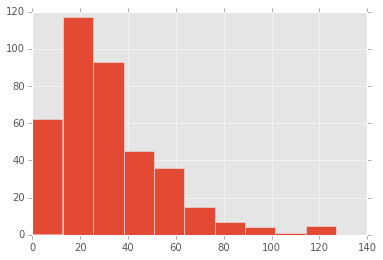

In [193]:
import matplotlib.pyplot as plt 
%matplotlib inline 
matplotlib.style.use('ggplot')


df_naomit['count_comments'].hist()
#barplot of dataframe on comments
#plt.hist(df['count_comments'])

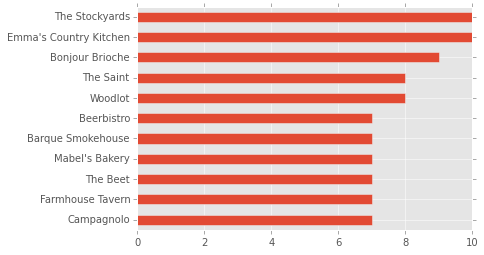

In [267]:
# the most winning places

df_naomit['Top_1'].value_counts()

#[df_naomit.ix[:,i].value_counts() for i in range(3,22)]

venues=df_naomit.ix[:,3:].apply(pd.Series.value_counts,axis=0).fillna(0)
venues['sum']=venues.sum(axis=1)
# find the venues that winnered more than 6 times
venues_sort=venues.sort('sum',ascending=False)
popular_values=venues_sort[venues_sort['sum']>6]

plt.figure()
popular_values['sum'].plot(kind='barh',sort_columns=True).invert_yaxis()


# count the number of winning with bar colors


In [298]:
# make word clouds for the key words 


import re
from collections import Counter
words_category=' '.join(df['category'].values.tolist())
#venues_category=' '.join(df_naomit.ix[:,3:].values.tolist())
print len(words_category)
#print len(venues_category)


7922


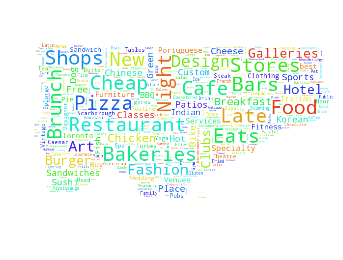

In [301]:
#word cloud with wordcount

from os import path
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

mask_map=imread("/Users/Serene/Downloads/toronto.jpeg")
wc=WordCloud(background_color="white",max_words=2000,
             mask=mask_map,stopwords=STOPWORDS,
             max_font_size=40,random_state=42)
plt.imshow(wc.generate(words_category))
plt.axis('off')
plt.show()

In [ ]:
# ceate maps of bests in Toronto, colored by category (for example the key words above)